<hr/>

# Data Mining [EN.550.436]
**Tamás Budavári** - budavari@jhu.edu <br/>
**Class 17** - November 3, 2015

- Midterm exam
- Clustering problems
- $k$-means clustering
- Voronoi tesselation

<hr/>

<h1><font color="darkblue">Midterm Exam</font></h1>

## Problem 1

Simone (a.k.a. Sim1) measured the temperature in her (virtual) room for a few days and saved the measurements in the attached [CSV](Midterm-Problem1.csv) file, which contains two columns: time and temperature. 

The script below implements her analysis of this data. What is she trying to do? Is she cold at night?

> 0. Run the analysis (1 pt)
> 0. Print and visualize the results (2 pts)
> 0. Read, understand and comment the code (4 pts)
> 0. Summarize your findings with your own words (3 pts)

Populating the interactive namespace from numpy and matplotlib
[  6.73004835e+01   5.78172283e-03  -5.92331089e-01  -3.78374664e+00]


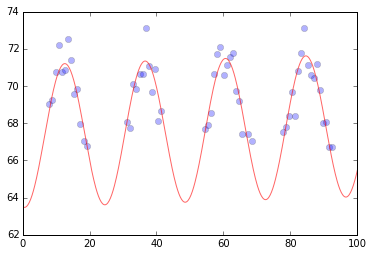

In [1]:
%pylab inline
#import numpy as np
#import matplotlib.pyplot as plt

data = np.loadtxt('files/Midterm-Problem1.csv', delimiter=',')
hour, temp = data[:,0], data[:,1]
plt.plot(hour,temp, 'bo', alpha=0.3); 

X = np.zeros( (hour.size,4) );
X[:,0] = 1
X[:,1] = hour 
X[:,2] = np.sin(hour * 2*pi/24)
X[:,3] = np.cos(hour * 2*pi/24)

Xpinv = np.linalg.inv( X.T.dot(X) ).dot(X.T)
coeff = Xpinv.dot(temp)
print coeff

hGrid = np.linspace(0,100,500)
Z = np.ones( (hGrid.size,4) );
Z[:,1] = hGrid
Z[:,2] = np.sin(hGrid * 2*pi/24) 
Z[:,3] = np.cos(hGrid * 2*pi/24)
tGrid = Z.dot(coeff)

plt.plot(hGrid,tGrid,'r-', alpha=0.6);

### Summary might have included things like...
- The code implements linear regression – IMPORTANT!
- The data doesn’t look linear but has some (daily) periodicity
- The fitting formula accounts for a possible linear trend in the temperature and periodic changes daily
- The fitting function is a linear combination of 4 terms
- The formula is  $F(t; \boldsymbol{c}) = c_0 + c_1  t + c_2\,\sin(2 \pi t/24) + c_3\,\cos(2 \pi t/24)$
- It accounts for shift in the phase
- The solution for $\boldsymbol{c}$ is in the **coeff** variable
- The temperature is increasing (slightly) over the days
- The best fitting function is evaluated on a grid for visualization
- According to the model, the night time temperature goes below … degrees


## Problem 2

Using her telescope Simone observed the nearest galaxies in the (virtual) Universe. She labeled the galaxies with spiral shapes as class "0" and the elliptical ones as "1". She noticed that they have different colors and measured the brightness of each galaxy (with her cellphone) through the red and cyan filters of a pair of anaglyph 3D glasses. The attached [CSV](Midterm-Problem2.csv) file contains the summary of her observations in 3 columns: red, cyan, shape. 

Help her build a classifier that can predict the shape of the galaxies from on the (red,cyan) brightness measurements. Which classifier do you recommend and why? Feel free to use the sklearn packages for everything you do.

>0. Plot the data colored by the labels (2 pts)
>0. Try a few different classifiers (2 pts)
>0. Try to pre-process the data to improve the predictions (1 pt)
>0. Compare the classifiers using 10-fold cross-validation to find the best (2 pts)
>0. Summarize your findings with your own words (3 pts)



In [2]:
data = np.loadtxt('files/Midterm-Problem2.csv',delimiter=',')
print data.shape

(400L, 3L)


<h1><font color="darkblue">Clustering</font></h1>

## Statistical Learning

- The methods in general fall in these 4 categories

>|                | Supervised     |         Unsupervised     |
 |:---------------|:--------------:|:------------------------:|
 | **Discrete**   | Classification | Clustering               |   
 | **Continuous** | Regression     | Dimensionality Reduction |



## Clustering is ...

... the process of collecting a set of objects into groups or clusters of similar items

####For example,

- Discover different species of birds based on their photographs
- Segment an image based on the pixel colors
- Organize news articles that cover the same story

<img src=http://www.codeproject.com/KB/recipes/439890/clustering-process.png width=450 align=left>

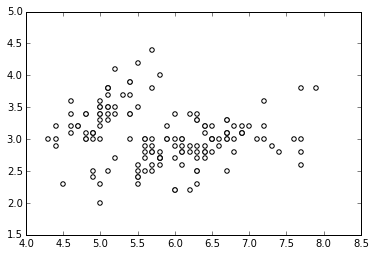

In [9]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,:2] 
# only the first 2 features

scatter(X[:,0],X[:,1],c='w');

## Types of Algorithms

- Flat

>0. Start with a random partitioning
>0. Iterate to improve the grouping

- Hierarchical

>0. Greedy grouping of closest: bottom up
>0. Greedy splitting of farthest: top down

### Flat example

<img src=http://simplystatistics.org/wp-content/uploads/2014/02/kmeans.gif  align=left width=300>

### Hierarchical example

> Set

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Clusters.svg/250px-Clusters.svg.png width=150 align=center>

> Dendogram

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/a/ad/Hierarchical_clustering_simple_diagram.svg/418px-Hierarchical_clustering_simple_diagram.svg.png width=250>

## $k$-means clustering

A simple (flat) algorithm


### Optimization

- Formally, it's an optimization over the possible groupings of objects

> For a set of $\{ x_l \}$ where $x_l\in \mathbb{R}^d$ for all $l$

>$\displaystyle  \hat{\boldsymbol{C}} = \textrm{arg}\min_{\boldsymbol{C}} \sum_{i=1}^k \left[\ \sum_{x\in{}C_i}\ |\!|x-\mu_i|\!|^2 \right] $

> where 

>$\displaystyle  \mu_i = \frac{1}{|C_i|}\sum_{x\in{}C_i} x $

### Algorithm

- Iteratively improving the $\mu_i$ **prototypes** of $k$ clusters

>0. Pick $k$ random objects as the initial $\mu_i$ prototypes
>0. Find for each object the closest prototype and assign to that cluster
>0. Calculate the averages for each cluster to get new $\mu_i$
>0. Repeat until convergence

- Often very fast - but no proof

### Animation

<img src=http://simplystatistics.org/wp-content/uploads/2014/02/kmeans.gif align=left width=300>

- Click on these <a href=http://shabal.in/visuals/kmeans/1.html>animations</a> to see the process of $k$-means clustering in action
 
> Starting from different points...

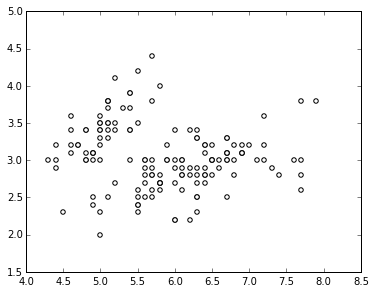

In [10]:
figure(figsize=(6,6)); ax=subplot(aspect='equal')
scatter(X[:,0],X[:,1],c='w');

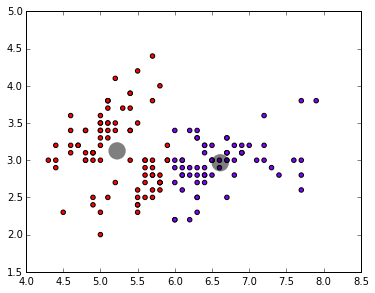

In [28]:
from sklearn.cluster import KMeans

kmeans = KMeans(init='random', n_clusters=2, n_init=100)
kmeans.fit(X)

figure(figsize=(6,6)); ax=subplot(aspect='equal')
scatter(X[:,0],X[:,1],c=kmeans.labels_,cmap=cm.rainbow);

C = kmeans.cluster_centers_
scatter(C[:,0],C[:,1],c='k',marker='o',s=300,alpha=0.5,edgecolor='none');

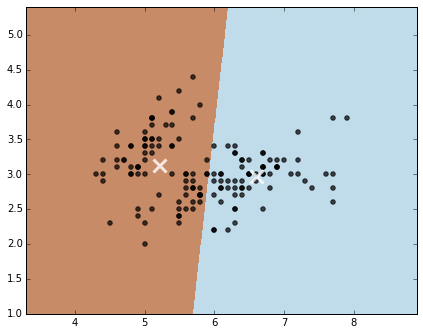

In [29]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .005    # point in the mesh [x_min, m_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X[:, 0].min() -1, X[:, 0].max() +1
y_min, y_max = X[:, 1].min() -1, X[:, 1].max() +1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
P = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
P = P.reshape(xx.shape)
figure(figsize=(7,7))
plt.clf()

plt.imshow(P, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='equal', origin='lower', alpha=0.7)

plt.scatter(X[:, 0], X[:, 1], c='k', alpha=0.7)

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10, alpha=0.8)

plt.xlim(x_min, x_max);
plt.ylim(y_min, y_max);

## Detour: Voronoi Tessellation & Delaunay Triangulation

<img src=http://christophermanning.org/images/2012/12/59dfbaa41a678cd39a4cc5b94ab8919740e51d9c.png align=left width=600>

## Limitations

- Initialization matters

> Rerun multiple times: **n_init** (default=10) <br/>
> Smart(er) starting points

- Assumes spherical clusters (use of distance function)

> Preprocessing becomes important even in simple cases <br>
> For example, whitening...

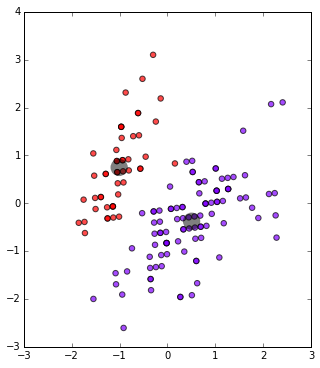

In [41]:
from sklearn.decomposition import PCA
Z = PCA(whiten=True).fit_transform(X)

kmeans = KMeans(n_clusters=2,n_init=100,init='k-means++')
kmeans.fit(Z)
C, L = kmeans.cluster_centers_, kmeans.labels_

figure(figsize=(6,6)); ax=subplot(aspect='equal')
scatter(Z[:,0],Z[:,1],c= L, marker='o',s= 30,alpha=0.7,cmap=cm.rainbow);
scatter(C[:,0],C[:,1],c='k',marker='o',s=300,alpha=0.5,edgecolor='none');